<a href="https://colab.research.google.com/github/M22AIE212/M22AIE212_SpeechUnderstanding_Assignment3/blob/main/A3_Custom_Dataset_LA_DF_FOR_FinetunedModel_evaluation_M22AIE212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Git clone SSL_Anti-spoofing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/M22AIE212/M22AIE212_SpeechUnderstanding_Assignment3.git

fatal: destination path 'M22AIE212_SpeechUnderstanding_Assignment3' already exists and is not an empty directory.


In [ ]:
!wget https://dl.fbaipublicfiles.com/fairseq/wav2vec/xlsr2_300m.pt

--2024-05-01 12:52:05--  https://dl.fbaipublicfiles.com/fairseq/wav2vec/xlsr2_300m.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.24.93, 3.163.24.72, 3.163.24.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.24.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3808868242 (3.5G) [binary/octet-stream]
Saving to: ‘xlsr2_300m.pt.1’

xlsr2_300m.pt.1     100%[===================>]   3.55G  72.3MB/s    in 61s     

2024-05-01 12:53:07 (59.5 MB/s) - ‘xlsr2_300m.pt.1’ saved [3808868242/3808868242]



## Setting up Environment

In [ ]:
!sh /content/M22AIE212_SpeechUnderstanding_Assignment3/setup.sh

fatal: destination path 'SSL_Anti-spoofing' already exists and is not an empty directory.
Obtaining file:///content/SSL_Anti-spoofing/fairseq-a54021305d6b3c4c5959ac9395135f63202db8f1
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for fairseq (pyproject.toml) ... done
  Created wheel for fairseq: filename=fairseq-1.0.0a0+4acaa61-0.editable-cp310-cp310-linux_x86_64.whl size=9253 sha256=f88414f41afca9b5fe8dd432a8e253306fb691b62755748c1b4f97b85009f458
  Stored in directory: /tmp/pip-ephem-wheel-cache-qj97k88k/wheels/7e/e7/f3/b9dc85bed2878480a562707319b545b2d7bbf958307b8eddc5
Successfully built fairseq
  Attempting uninstall: fairseq
    Found existing installation: fairseq 1.0.0a0+4acaa61
    Uninstalling fairseq-1.0.0a0+4acaa61:
      Successfully uninstalled fairseq-1

## Dataset Pull

In [ ]:
!mkdir /content/data
!unzip '/content/drive/MyDrive/Assignments/SpeechUnderstanding/A3/Dataset_Speech_Assignment.zip' -d /content/data/

Archive:  /content/drive/MyDrive/Assignments/SpeechUnderstanding/A3/Dataset_Speech_Assignment.zip
   creating: /content/data/Dataset_Speech_Assignment/
  inflating: /content/data/Dataset_Speech_Assignment/.DS_Store  
  inflating: /content/data/__MACOSX/Dataset_Speech_Assignment/._.DS_Store  
   creating: /content/data/Dataset_Speech_Assignment/Real/
   creating: /content/data/Dataset_Speech_Assignment/Fake/
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_04_zVVCun3C-oU.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_00_lxuaQDmrBg8.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_07_4jhJPdJPorY.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_00_akbwr49hP0A.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_00_U4px7ANlmck.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_11_ZWNArvn5-_Y.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_00_vbj9tOXCBu0.wav  
  inflat

/content/data/Dataset_Speech_Assignment/Fake/en-US-Standard-J.wav
/content/data/Dataset_Speech_Assignment/Fake/en-US-Standard-J.flac
/content/data/Dataset_Speech_Assignment/Fake/Play.ht+-+short+story.wav
/content/data/Dataset_Speech_Assignment/Fake/Play.ht+-+short+story.flac
/content/data/Dataset_Speech_Assignment/Fake/Obama-sample.wav
/content/data/Dataset_Speech_Assignment/Fake/Obama-sample.flac
/content/data/Dataset_Speech_Assignment/Fake/dba46c933622273eace54e6c071a6216.mp3
/content/data/Dataset_Speech_Assignment/Fake/dba46c933622273eace54e6c071a6216.flac
/content/data/Dataset_Speech_Assignment/Fake/full_-MiaJSQIwiH93mWxCT8q.wav
/content/data/Dataset_Speech_Assignment/Fake/full_-MiaJSQIwiH93mWxCT8q.flac
/content/data/Dataset_Speech_Assignment/Fake/Jordan+US.wav
/content/data/Dataset_Speech_Assignment/Fake/Jordan+US.flac
/content/data/Dataset_Speech_Assignment/Fake/Fake_Fin.mp3
/content/data/Dataset_Speech_Assignment/Fake/Fake_Fin.flac
/content/data/Dataset_Speech_Assignment/Fake/en

/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Scores are saved to /content/la_score.txt
Total parameters: 317837834
Model loaded: /content/drive/MyDrive/Assignments/SpeechUnderstanding/A3/best_finetuned_DF_model.pth


/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Scores are saved to /content/df_score.txt
Equal Error Rate = LA model :  0.3618


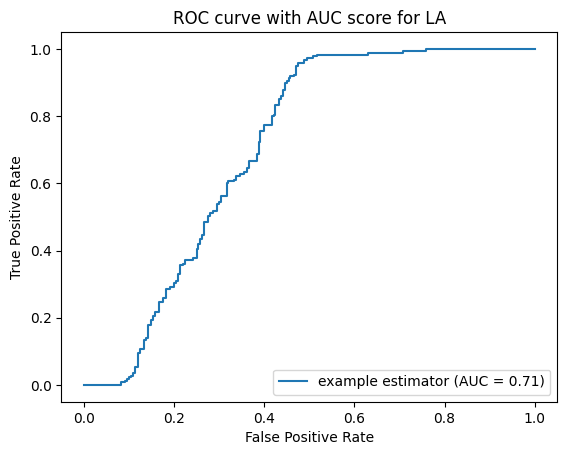

Equal Error Rate = DF model :  0.4215


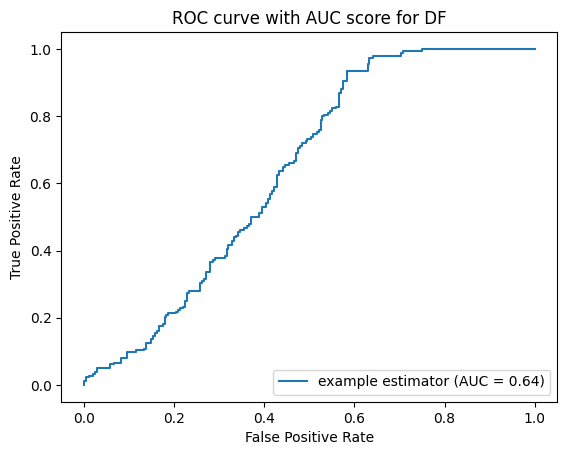

In [ ]:
import sys
sys.path.append("/content/SSL_Anti-spoofing/")
sys.path.append("/content/M22AIE212_SpeechUnderstanding_Assignment3/")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from torch import Tensor
import librosa

from utils import convert_to_flac ,CustomDataset,Arguments,produce_evaluation_file,compute_eer,plot_roc_curve_with_auc
import glob
from model_loader import ModelLoader

if __name__ == "__main__" :
  ## set device
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  batch_size = 2

  ## Arguments
  args = Arguments(
      la_model_path='/content/drive/MyDrive/Assignments/SpeechUnderstanding/A3/best_finetuned_LA_model.pth',
      df_model_path='/content/drive/MyDrive/Assignments/SpeechUnderstanding/A3/best_finetuned_DF_model.pth',
      eval=True,
      la_eval_output='/content/la_score.txt',
      df_eval_output='/content/df_score.txt'
  )

  # ## Data Conversion
  input_directory = "/content/data/Dataset_Speech_Assignment"
  convert_to_flac(input_directory)


  ## Create a DataFrame with audio file paths
  df = pd.DataFrame(glob.glob("/content/data/Dataset_Speech_Assignment/*/*"), columns=['file_path'])

  ## Extract labels from file paths
  df['real_or_fake'] = df['file_path'].apply(lambda x: x.split('/')[-2])

  ## Assign labels (1 for 'Real', 0 for 'Fake')
  df['label'] = df['real_or_fake'].apply(lambda x: 1 if x == 'Real' else 0)


  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  model_loader = ModelLoader(args, device)

  # Evaluation Dataset
  eval_set = CustomDataset(df.file_path.tolist(), df.label.tolist())

  ## Inference - LA model
  model = model_loader.load_model('la')
  produce_evaluation_file(eval_set,batch_size, model, device, args.la_eval_output)

  ## Inference - DF model
  model = model_loader.load_model('df')
  produce_evaluation_file(eval_set,batch_size, model, device, args.df_eval_output)

  ## Evaluation - LA model
  la_df = pd.read_csv('/content/la_score.txt', sep = ' ', header = None)
  la_df.columns = ['actual', 'scores']
  la_eer = compute_eer(la_df.actual, la_df.scores)
  print("Equal Error Rate = LA model : ", round(la_eer, 4))
  plot_roc_curve_with_auc(la_df.actual, la_df.scores, 'la')

  ## Evaluation - DF model
  df_df = pd.read_csv('/content/df_score.txt', sep = ' ', header = None)
  df_df.columns = ['truth', 'scores']
  df_eer = compute_eer(df_df.truth, df_df.scores)
  print("Equal Error Rate = DF model : ", round(df_eer, 4))
  plot_roc_curve_with_auc(df_df.truth, df_df.scores, 'df')